In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head(4)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [4]:
df.shape

(200, 5)

In [5]:
len(df[df.duplicated()])

0

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.drop('Unnamed: 0' , axis=1, inplace= True)

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


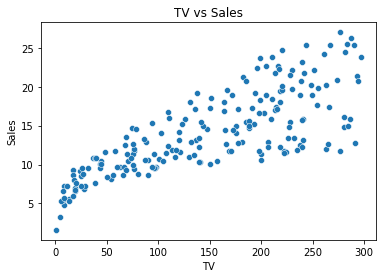

In [12]:
sns.scatterplot(data=df, x='TV',y='Sales')
plt.title('TV vs Sales')
plt.show()

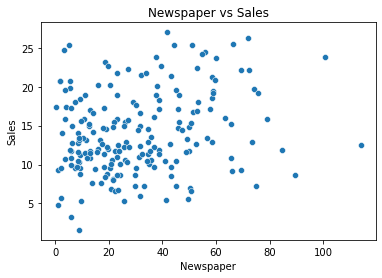

In [13]:
sns.scatterplot(data=df, x='Newspaper',y='Sales')
plt.title('Newspaper vs Sales')
plt.show()

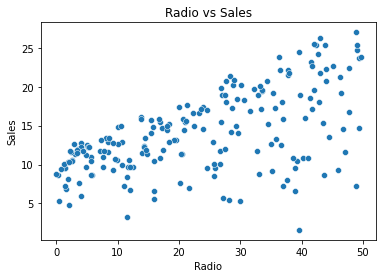

In [14]:
sns.scatterplot(data=df, x='Radio',y='Sales')
plt.title('Radio vs Sales')
plt.show()

In [15]:
X=df.drop('Sales', axis=1)
y=df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 3), (60, 3), (140,), (60,))

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
print('Train R2-score:',r2_score(y_train,y_train_pred))
print('Test R2-score:',r2_score(y_test,y_test_pred))

Train R2-score: 0.9055159502227753
Test R2-score: 0.8609466508230368


### Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [23]:
print('Train R2-score:',r2_score(y_train,y_train_pred))
print('Test R2-score:',r2_score(y_test,y_test_pred))

Train R2-score: 1.0
Test R2-score: 0.9362989092500563


### Random Forest 

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [28]:
print('Train R2-score:',r2_score(y_train,y_train_pred))
print('Test R2-score:',r2_score(y_test,y_test_pred))

Train R2-score: 0.9959056940123125
Test R2-score: 0.9837068712149628
